In [81]:
import os
from matplotlib import pyplot as plt, cm
import pandas as pd
import numpy as np
import scipy as sp
# import seaborn as sns
%matplotlib inline
print(plt.style.available)
# plt.style.use('seaborn-pastel')
plt.style.use('seaborn-notebook')
# plt.style.use('ggplot')
from scikits.audiolab import wavread
from scikits.talkbox.features import mfcc
# from bokeh import mpl
# from bokeh.plotting import output_file, show

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


22050 pcm16


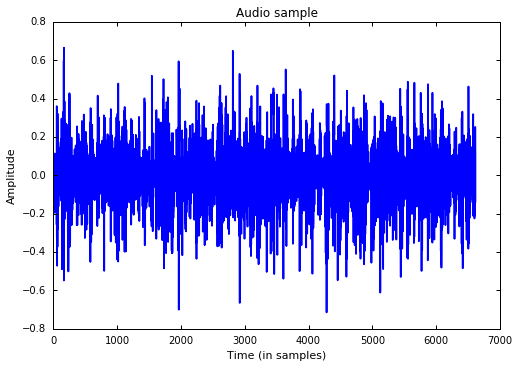

In [5]:
data, fs, enc = wavread('genres/blues/blues.00000.wav')
print fs, enc
# plt.plot(data)
# to avoid long loading times in d3.js
plt.plot(data[0:len(data):100])
plt.title('Audio sample')
plt.xlabel('Time (in samples)')
plt.ylabel('Amplitude')
output_file("waveform.html", title="Waveform visualization")
plt.show()

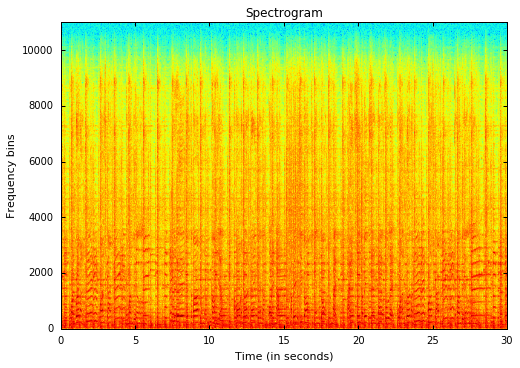

Plot(id='24d21928-ff00-4862-88d9-3b296159e058', ...)

In [6]:
NFFT = 1024
ax = plt.specgram(data, NFFT=NFFT, Fs=fs)
plt.title('Spectrogram')
plt.xlabel('Time (in seconds)')
plt.ylabel('Frequency bins')
plt.ylim([0,22050/2.])
output_file("specgram.html", title="Spectrogram visualization")
plt.show()
mpl.to_bokeh()

In [7]:
rootdir = 'genres'
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'metal']

In [8]:
sound_names = []
labels = []

for dirpath, dirname, files in os.walk(rootdir):
    for f in files:
        if f.endswith('.wav'):
            sound_names.append(os.path.join(dirpath,f))
            labels.append(dirpath.split('/')[1])
print sound_names[:5], labels[:5]
print len(sound_names)

['genres/blues/blues.00000.wav', 'genres/blues/blues.00001.wav', 'genres/blues/blues.00002.wav', 'genres/blues/blues.00003.wav', 'genres/blues/blues.00004.wav'] ['blues', 'blues', 'blues', 'blues', 'blues']
1000


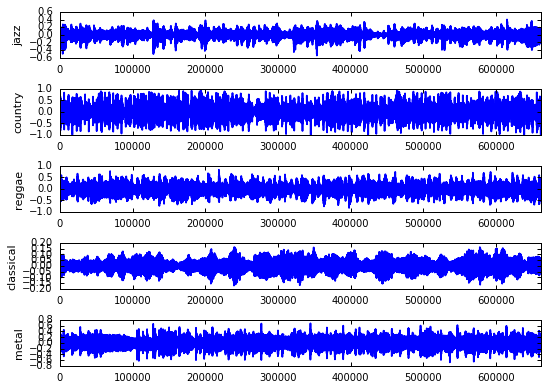

In [270]:
data = []
target = []
number_of_sounds = 1000
for i in range(1, number_of_sounds + 1):
    rand_int = np.random.randint(0,len(sound_names))
    sound_name = sound_names[rand_int]
    label = labels[rand_int]
    try:
        snd = wavread(sound_name)
    except:
        continue
    data.append(snd)
    target.append(label)


data = np.array(data)
target = np.array(target)

def plot_sounds(data_set, labels):
    i = 1
    for snd, label in zip(data_set,labels):
        plt.subplot(len(data_set),1,i)
        plt.plot(snd[0])
        plt.ylabel(label)
        plt.tight_layout()
        plt.xlim([0,len(snd[0])])
        i += 1

plot_sounds(data[:5], target[:5])


In [137]:
from scipy.signal import hann

def dft_np(signal, hop_size=256, fft_size=512):
    n_hops = len(signal) // hop_size
    s = []
    hann_win = hann(fft_size)
    for hop_i in range(n_hops):
        frame = signal[(hop_i * hop_size):(hop_i * hop_size + fft_size)]
        frame = np.pad(frame, (0, fft_size - len(frame)), 'constant')
        frame *= hann_win
        s.append(frame)
    s = np.array(s)
    N = s.shape[-1]
    k = np.reshape(np.linspace(0.0, 2 * np.pi / N * (N // 2), N // 2), [1, N // 2])
    x = np.reshape(np.linspace(0.0, N - 1, N), [N, 1])
    freqs = np.dot(x, k)
    reals = np.dot(s, np.cos(freqs)) * (2.0 / N)
    imags = np.dot(s, np.sin(freqs)) * (2.0 / N)
    return reals, imags

def ztoc(re, im):
    return np.sqrt(re**2 + im**2), np.angle(re + im * 1j)

def ctoz(mag, phs):
    return mag * np.cos(phs), mag * np.sin(phs)


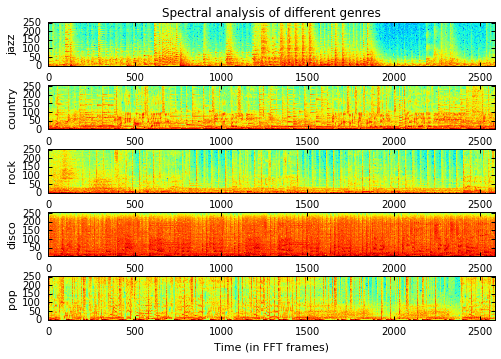

In [224]:
fft_size = 512
hop_size = 256
plt.close('all')
re, im = dft_np(data[0][0], hop_size=256, fft_size=512)
mag, phs = ztoc(re, im)

def plot_specgrams(data_set, labels, hop_size, fft_size):
    i = 0
    f, axes = plt.subplots(len(data_set))#, sharex=True, sharey=False)
    axes[0].set_title('Spectral analysis of different genres')
    axes[len(data_set)-1].set_xlabel("Time (in FFT frames)")
    for snd, label in zip(data_set,labels):
#         plt.subplot(len(data_set),1,i) #, sharey=True, sharex=True)
#         P,freqs,bins,im = plt.specgram(snd[0])
        re, im = dft_np(snd[0], hop_size=hop_size, fft_size=fft_size)
        mag, phs = ztoc(re, im)
        axes[i].imshow(np.log(mag.T))
#         f.subplots_adjust(hspace=0)
        axes[i].set_ylabel(label)
        axes[i].invert_yaxis()
#         axes[i].autoscale_view()
#         axes[i].set_ylim([250, 10])
#         print axes[i].get_ylim()
#         f.gca().invert_yaxis()
#         plt.tight_layout()        
        i += 1
    return f

fig = plot_specgrams(data[:5], target[:5], hop_size, fft_size)

import mpld3
mpld3.save_html(fig, 'specgrams_.html')


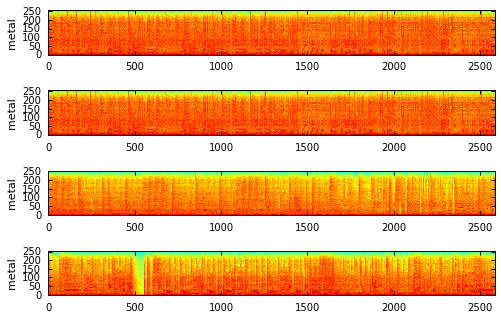

In [213]:
plot_specgrams(data[target=='metal'][:4], target[target=='metal'][:4], hop_size, fft_size)

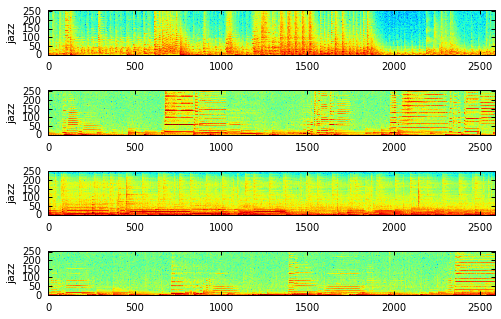

In [214]:
plot_specgrams(data[target=='jazz'][:4], target[target=='jazz'][:4], hop_size, fft_size)

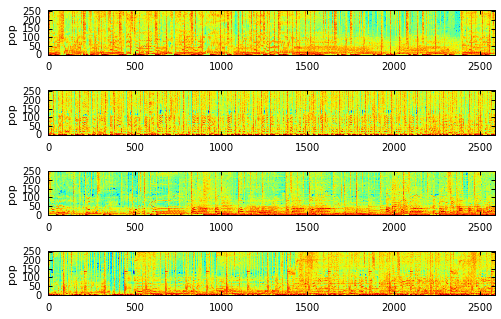

In [215]:
plot_specgrams(data[target=='pop'][:4], target[target=='pop'][:4], hop_size, fft_size)

In [271]:
def compute_features(data_set, hop_size, fft_size):
    X = []
    for snd in data_set:
        re, im = dft_np(snd[0], hop_size=hop_size, fft_size=fft_size)
        mag, phs = ztoc(re, im)
#         np.log(mag.T)
        # average fft coefs over all frames to give 256 values per track
        m = np.mean(mag,axis=0)
        X.append(m)
    return np.array(X)

X = compute_features(data, hop_size, fft_size)

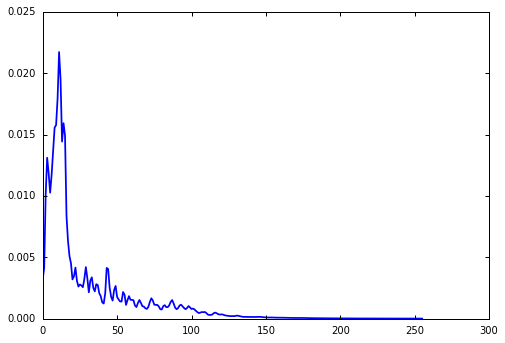

In [273]:
#plt.imshow(np.log(X[0].T))
plt.plot(X[900])

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import preprocessing

In [275]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
y = target

In [276]:
print "mean: {} std: {}".format(X_scaled.mean(), X_scaled.std())
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)
print "unique classes: ", np.unique(target)
print "number of classes:", len(np.unique(target))

mean: 8.26005930321e-17 std: 1.0
unique classes:  ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']
number of classes: 10


In [277]:
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_test, y_test)

0.907462686567
0.757575757576


[learning_curve] Training set sizes: [ 44 143 243 342 442]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.7s finished


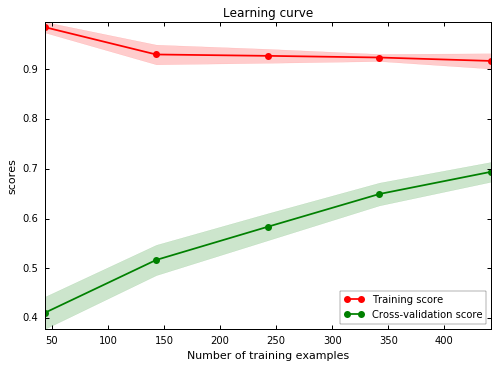

In [278]:
from sklearn.model_selection import learning_curve
def learning_curves(model, X_train, y_train, scoring='accuracy', cv=5):
  plt.figure()
  plt.title("Learning curve")
  plt.xlabel("Number of training examples")
  plt.ylabel("scores")
  train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, scoring=scoring, cv=cv, verbose=1)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score", color="r")
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
  plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score", color="g")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
  plt.legend(loc="best")
  plt.autoscale(tight=True)
  plt.show()
model = LogisticRegression()
learning_curves(model, X_train, y_train, cv=3)

5−Fold Cross Validation Accuracy: 0.70 (+/− 0.02)
−−−−−− training set report−−−−−
             precision    recall  f1-score   support

      blues       0.87      0.91      0.89        74
  classical       0.80      1.00      0.89        67
    country       0.94      0.79      0.86        61
      disco       0.96      0.90      0.93        80
     hiphop       0.90      0.90      0.90        59
       jazz       0.94      0.89      0.91        66
      metal       0.96      0.97      0.97        71
        pop       1.00      0.98      0.99        58
     reggae       0.88      0.91      0.89        64
       rock       0.88      0.83      0.85        70

avg / total       0.91      0.91      0.91       670

−−−−−−− testing set report −−−−−
             precision    recall  f1-score   support

      blues       0.64      0.68      0.66        31
  classical       0.63      0.96      0.76        23
    country       0.92      0.70      0.80        50
      disco       0.71      0.69 

/usr/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


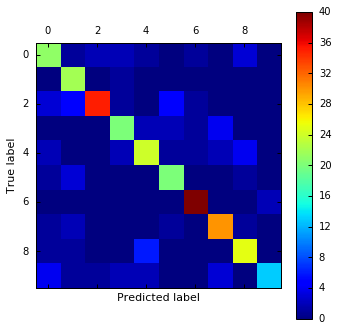

In [279]:
from sklearn import cross_validation, metrics
from scipy.stats import sem
cv = cross_validation.KFold(X_train.shape[0], 5,
shuffle=True , random_state=33)
model = LogisticRegression()
scores = cross_validation.cross_val_score(model, X_train, y_train , cv=cv )
print("%d−Fold Cross Validation Accuracy: %0.2f (+/− %0.2f)"%(5,scores.mean() , sem(scores)))
print "−−−−−− training set report−−−−−"
y_pred_train = logreg.predict(X_train)
print metrics.classification_report(y_train, y_pred_train)
print "−−−−−−− testing set report −−−−−"
y_pred_test = logreg.predict(X_test)
print metrics.classification_report(y_test, y_pred_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.matshow(confusion_matrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()